# Nigeria Housing Price Exploratory Data Analysis (EDA)

## Background
Housing prices in Nigeria vary significantly across locations, property types,
and structural features. Understanding the drivers of these price differences
is essential for informed decision-making in real estate investment, urban
planning, and financial analysis.

However, real-world housing data often contains inconsistencies, extreme values,
and high variability that can distort analysis if not handled carefully.

## Objective
The objective of this project is to explore Nigerian housing price data to:
- Understand the distribution of house prices
- Identify key drivers of price variation
- Detect and address data quality issues such as outliers and skewness
- Prepare the dataset for future regression modeling

This notebook focuses on **exploratory analysis and data cleaning**, not
predictive modeling.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("../data/nigeria_houses_data.csv")

df.head()


,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


## Data Overview


In [18]:
df.shape

(24326, 8)

In [19]:
df.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,24326.000000,24326.000000,24326.000000,24326.000000,2.432600e+04
mean,4.338814,4.600798,5.176355,4.041725,3.013802e+08
std,1.138497,1.163161,1.226253,1.399936,1.220403e+10
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04
25%,4.000000,4.000000,5.000000,4.000000,5.200000e+07
50%,4.000000,5.000000,5.000000,4.000000,8.500000e+07
75%,5.000000,5.000000,6.000000,4.000000,1.600000e+08
max,9.000000,9.000000,9.000000,9.000000,1.800000e+12


In [20]:
df.columns

Index(['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'title', 'town',
       'state', 'price'],
      dtype='object')

## Data Quality Challenges
Initial exploration revealed extreme price outliers, skewed distributions,
and inconsistent categorical granularity, which required careful cleaning.


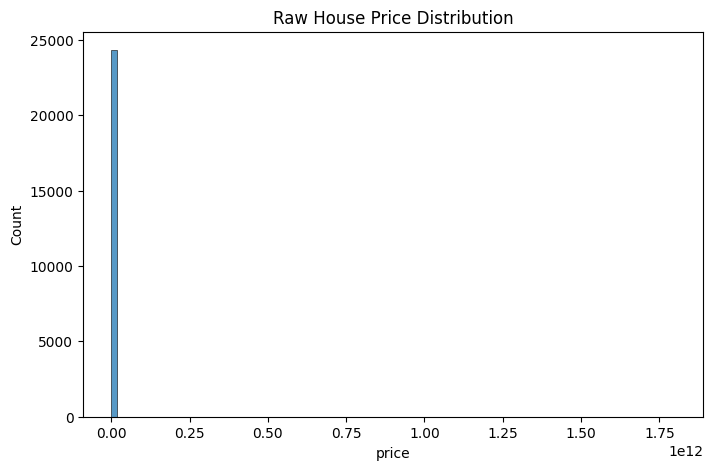

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=100)
plt.title("Raw House Price Distribution")
plt.show()


## Price Transformation and Outlier Handling
This section addresses the heavy skewness in house prices using log
transformation and percentile-based capping.


In [22]:
import numpy as np

df['log_price'] = np.log10(df['price'])


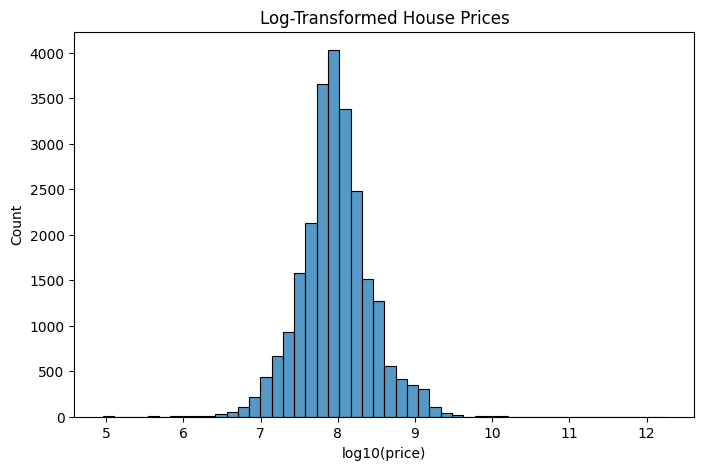

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(df['log_price'], bins=50)
plt.title("Log-Transformed House Prices")
plt.xlabel("log10(price)")
plt.show()


## Price Distribution and Skewness

The raw house price distribution is extremely right-skewed, with a small number
of extreme values dominating the scale. As a result, the mean price is misleading
and does not represent a typical house price.

Applying a log transformation stabilizes the distribution, revealing a clear
central tendency and making the data more suitable for further analysis and
future regression modeling.


In [24]:
df['price'].quantile([0.01, 0.05, 0.95, 0.99])


0.01    7.200000e+06
0.05    1.600000e+07
0.95    6.000000e+08
0.99    1.400000e+09
Name: price, dtype: float64

In [25]:
df[df['price'] < df['price'].quantile(0.01)].head()


,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,log_price
33,2.0,3.0,5.0,4.0,Block of Flats,Mowe Ofada,Ogun,7000000.0,6.845098
56,2.0,2.0,2.0,4.0,Detached Bungalow,Abeokuta North,Ogun,4000000.0,6.602060
78,1.0,2.0,2.0,1.0,Block of Flats,Sango Ota,Ogun,6900000.0,6.838849
88,4.0,2.0,2.0,1.0,Terraced Bungalow,Sango Ota,Ogun,5000000.0,6.698970
160,4.0,5.0,5.0,2.0,Detached Bungalow,Ado-Odo/Ota,Ogun,6000000.0,6.778151


In [26]:
df[df['price'] > df['price'].quantile(0.99)].head()


,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,log_price
244,5.0,5.0,6.0,4.0,Detached Duplex,Ikoyi,Lagos,1.500000e+09,9.176091
342,6.0,5.0,7.0,8.0,Detached Duplex,Ikoyi,Lagos,1.600000e+09,9.204120
502,1.0,1.0,2.0,4.0,Detached Duplex,Asokoro District,Abuja,1.500000e+09,9.176091
504,4.0,5.0,5.0,4.0,Block of Flats,Ikoyi,Lagos,1.500000e+10,10.176091
588,5.0,5.0,6.0,1.0,Detached Duplex,Ikoyi,Lagos,1.700000e+09,9.230449


In [27]:
#winsorization 
lower = df['price'].quantile(0.01)
upper = df['price'].quantile(0.99)

df['price_clean'] = df['price'].clip(lower, upper)
df['log_price_clean'] = np.log10(df['price_clean'])


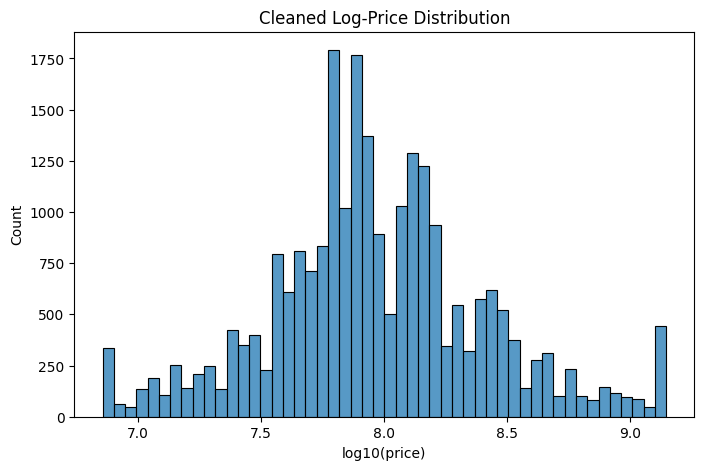

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(df['log_price_clean'], bins=50)
plt.title("Cleaned Log-Price Distribution")
plt.xlabel("log10(price)")
plt.show()


## Handling Extreme Price Values

The dataset contains extreme price values that significantly distort summary
statistics and visualizations. Rather than removing observations, so i capped extreme values at the 1st and 99th percentiles to preserve data size while reducing
the influence of outliers.

The cleaned log-transformed price variable is used for subsequent analysis and
future modeling.


In [29]:
df[['state', 'town', 'title']].nunique()


state     25
town     189
title      7
dtype: int64

In [30]:
df['town'].value_counts().head(10)


town
Lekki                   10895
Ajah                     2164
Ikoyi                    1547
Ikeja                     688
Ibeju Lekki               503
Victoria Island (VI)      496
Port Harcourt             435
Ibadan                    413
Gwarinpa                  391
Magodo                    375
Name: count, dtype: int64

In [31]:
top_towns = df['town'].value_counts().head(20).index

df['town_grouped'] = df['town'].where(df['town'].isin(top_towns), 'Other')


In [32]:
df['town_grouped'].value_counts()


town_grouped
Lekki                   10895
Other                    4079
Ajah                     2164
Ikoyi                    1547
Ikeja                     688
Ibeju Lekki               503
Victoria Island (VI)      496
Port Harcourt             435
Ibadan                    413
Gwarinpa                  391
Magodo                    375
Life Camp                 298
Guzape District           287
Katampe                   257
Maitama District          252
Ikorodu                   241
Lokogoma District         221
Isheri North              217
Owerri Municipal          211
Mowe Ofada                180
Isolo                     176
Name: count, dtype: int64

In [34]:
df['title'].value_counts()


title
Detached Duplex           13992
Terraced Duplexes          3237
Semi Detached Duplex       2615
Detached Bungalow          2108
Block of Flats             1745
Semi Detached Bungalow      452
Terraced Bungalow           177
Name: count, dtype: int64

## Location and Property Type Analysis
This section explores how geographic location and property structure
influence housing prices across Nigeria.


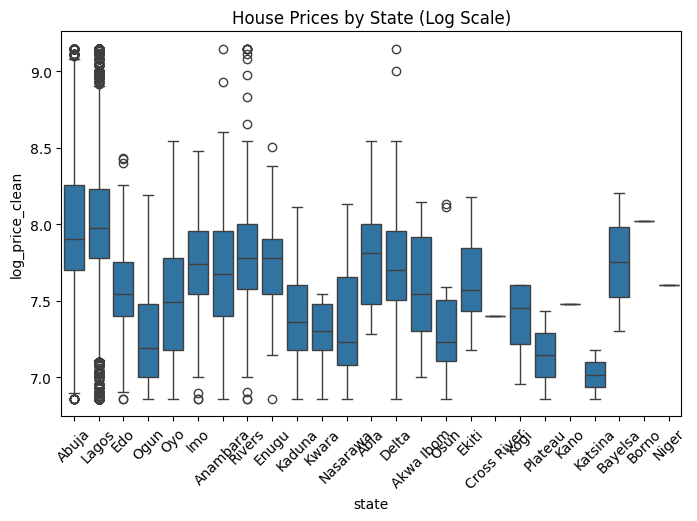

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x='state', y='log_price_clean', data=df)
plt.title("House Prices by State (Log Scale)")
plt.xticks(rotation=45)
plt.show()


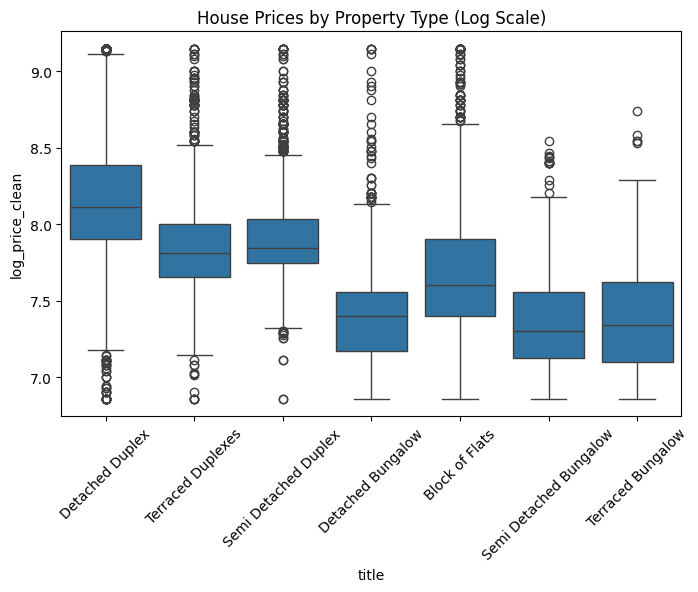

In [36]:
plt.figure(figsize=(8,5))
sns.boxplot(x='title', y='log_price_clean', data=df)
plt.xticks(rotation=45)
plt.title("House Prices by Property Type (Log Scale)")
plt.show()


## Categorical Feature Insights

Location-related variables strongly influence house prices. Properties located in
Abuja generally command higher prices compared to most other states, reflecting
differences in land use policies and market structure.

Among property types, detached duplexes tend to be the most expensive, while
bungalows and terraced houses are relatively more affordable. Due to the high
cardinality of town-level data, rare towns were grouped into an "Other" category
to reduce noise and improve interpretability.


## Key Insights

- House prices in Nigeria are extremely right-skewed, with a small number of
  very high-priced properties distorting the overall distribution. As a result,
  the median price is more representative than the mean.

- Location is the strongest driver of housing prices. Properties located in
  Abuja generally command higher prices than those in Lagos and other states.

- Property type influences pricing, with detached duplexes typically priced
  higher than terraced houses and bungalows. However, structural features alone
  do not fully explain price variation.

- Raw housing price data is not suitable for direct modeling due to extreme
  outliers. Log transformation and percentile-based capping significantly improve
  data stability and interpretability.

- High-cardinality town-level data introduces noise. Grouping rare towns into an
  "Other" category improves clarity and prepares the dataset for future modeling.


## Conclusion

This exploratory analysis demonstrates the importance of careful data
preprocessing when working with real-world housing data. By addressing skewed
price distributions, extreme outliers, and categorical complexity, the dataset
has been transformed into a more reliable and interpretable form.

The cleaned dataset is now well-prepared for future regression modeling to
predict housing prices and quantify the impact of key features such as location
and property type.
